# EDA Bern-Daten vom GIS Kanton Bern
Im  folgenden möchten wir die GIS-Daten vom Kanton Bern des Jahres 2022 genauer betrachten und uns ein Bild über die Daten machen und mit dem ZüriCrop Datensatz vergleichen

## Untersuchung der Labels

In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt
import numpy as np

Im folgenden sieht man die Rohdaten vom Kanton Bern. Für uns entscheidend sind der LNF_Code, der auch im ZüriCrop verwendet wurde, sowie die letzten zwei Spalten Shape Area und geometry. Diese geben uns jeweils die Polygone und die Fläche in m2 der einzelnen Landwirtschaftsflächen aus.

In [4]:
df_landkult = pd.read_csv('bern_landkult.csv')
df_landkult.head()

,Unnamed: 0,IST_DEF,KULTGRUPPE,KULTGRUT_K,KULTGRUT_1,LNF_CODE,KULTURT_KU,KULTURT__1,NHG,NUTZUNG,...,DARSGRUPPE,DARSGRUT_D,DARSGRUT_1,GEOID,HAUPTKAT,HAKAT_HK_D,HAKAT_HK_F,Shape_Leng,Shape_Area,geometry
0,0,0,2041,übrige Nutzfläche Wiese,autres prairies,613,Übrige Dauerwiesen (ohne Weiden),Autres prairies permanentes (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,766613,1,Dauerwiesen,Prairies permanentes,1114.998396,30892.048265,POLYGON ((2618423.677000001 1184801.3370000012...
1,1,0,2041,übrige Nutzfläche Wiese,autres prairies,613,Übrige Dauerwiesen (ohne Weiden),Autres prairies permanentes (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,309561,1,Dauerwiesen,Prairies permanentes,194.265546,2273.000733,"POLYGON ((2614314.524 1201860.5579999983, 2614..."
2,2,0,2039,übrige Nutzfläche,autres SAU,857,"Hecken-, Feld- und Ufergehölze (mit Pufferstre...","Haies, bosquets champêtres et berges boisées (...",0,1,...,99,keine BFF I,aucune SPB I,301706,8,"Hecken-, Feld- und Ufergehölze","Haies, bosquets et berges boisées",204.997401,883.631964,"POLYGON ((2595145.217 1235490.5009999983, 2595..."
3,3,0,2048,Grünland,prairie,601,Kunstwiesen (ohne Weiden),Prairies artificielles (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,969184,0,Ackerfläche,Terres cultivées,387.805081,6898.488772,POLYGON ((2609669.5689999983 1183282.254000000...
4,4,0,2048,Grünland,prairie,601,Kunstwiesen (ohne Weiden),Prairies artificielles (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,950199,0,Ackerfläche,Terres cultivées,213.983203,1756.279697,POLYGON ((2626440.8330000006 1219877.210999999...


Die Labels des ZüriCrop Datensatzes sind öffentlich in ihrem Repository erhältlich. Die eindeutige Kennzeichnung erfolgt übert den LNF_CODE.

In [3]:
labels_zueri = pd.read_csv('labels_zuericrop.csv')
labels_zueri.head()

,GT,LNF_code,raw_DE,raw_ENG,1st_tier,2nd_tier,3rd_tier,4th_tier_ENG,empty
0,1,501,Sommergerste,summer barley,Vegetation,Field crops,SmallGrainCereal,SummerBarley,NaN
1,2,502,Wintergerste,Winter barley,Vegetation,Field crops,SmallGrainCereal,WinterBarley,NaN
2,3,504,Hafer,oats,Vegetation,Field crops,SmallGrainCereal,Oat,NaN
3,4,505,Triticale,triticale,Vegetation,Field crops,SmallGrainCereal,Wheat,NaN
4,5,506,Mischel Futtergetreide,mixed fodder cereals,Vegetation,Field crops,SmallGrainCereal,Grain,NaN


Die GIS-Daten werden in ein geopandas umgewandelt, um eine Auswertung über die Flächen machen zu können. 

In [5]:
"""https://stackoverflow.com/questions/61122875/geopandas-how-to-read-a-csv-and-convert-to-a-geopandas-dataframe-with-polygons"""

df_landkult['geometry'] = df_landkult['geometry'].apply(wkt.loads)
crs = {'init': 'epsg:2056'}
gdf = gpd.GeoDataFrame(df_landkult, crs=crs, geometry='geometry')
gdf.head()

c:\Users\danie\.virtualenvs\AgroLuege-HGn9_VQi\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Unnamed: 0,IST_DEF,KULTGRUPPE,KULTGRUT_K,KULTGRUT_1,LNF_CODE,KULTURT_KU,KULTURT__1,NHG,NUTZUNG,...,DARSGRUPPE,DARSGRUT_D,DARSGRUT_1,GEOID,HAUPTKAT,HAKAT_HK_D,HAKAT_HK_F,Shape_Leng,Shape_Area,geometry
0,0,0,2041,übrige Nutzfläche Wiese,autres prairies,613,Übrige Dauerwiesen (ohne Weiden),Autres prairies permanentes (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,766613,1,Dauerwiesen,Prairies permanentes,1114.998396,30892.048265,"POLYGON ((2618423.677 1184801.337, 2618428.244..."
1,1,0,2041,übrige Nutzfläche Wiese,autres prairies,613,Übrige Dauerwiesen (ohne Weiden),Autres prairies permanentes (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,309561,1,Dauerwiesen,Prairies permanentes,194.265546,2273.000733,"POLYGON ((2614314.524 1201860.558, 2614300.633..."
2,2,0,2039,übrige Nutzfläche,autres SAU,857,"Hecken-, Feld- und Ufergehölze (mit Pufferstre...","Haies, bosquets champêtres et berges boisées (...",0,1,...,99,keine BFF I,aucune SPB I,301706,8,"Hecken-, Feld- und Ufergehölze","Haies, bosquets et berges boisées",204.997401,883.631964,"POLYGON ((2595145.217 1235490.501, 2595142.915..."
3,3,0,2048,Grünland,prairie,601,Kunstwiesen (ohne Weiden),Prairies artificielles (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,969184,0,Ackerfläche,Terres cultivées,387.805081,6898.488772,"POLYGON ((2609669.569 1183282.254, 2609668.012..."
4,4,0,2048,Grünland,prairie,601,Kunstwiesen (ohne Weiden),Prairies artificielles (sans les pâturages),0,1,...,99,keine BFF I,aucune SPB I,950199,0,Ackerfläche,Terres cultivées,213.983203,1756.279697,"POLYGON ((2626440.833 1219877.211, 2626441.442..."


Im folgenden sieht man die gesamten Agrarflächen im Kanton Bern dargestellt im Koordinatensystem LV95 der Schweiz.

<Axes: >

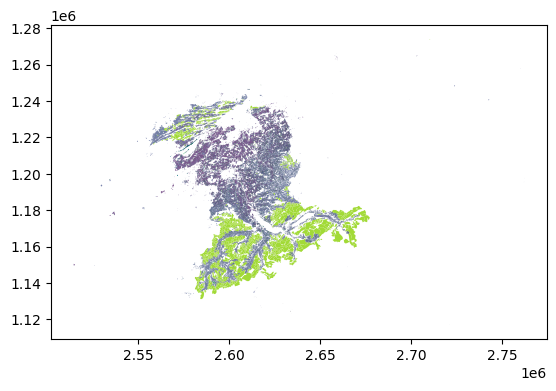

In [6]:
gdf.plot(column='LNF_CODE')

<Axes: >

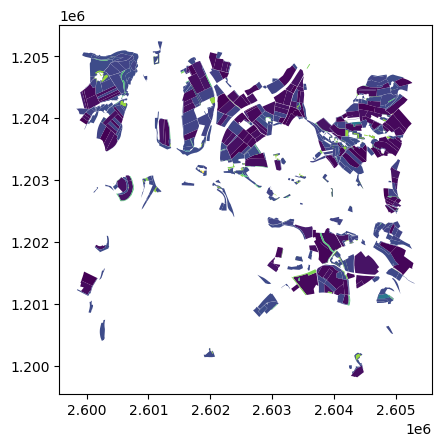

In [7]:
gdf.cx[2.60e6:2.605e6, 1.2e6:1.205e6].plot(column='LNF_CODE')

Der Kanton Bern hat eine Fläche von 5'960 km2, die Summe der Agrarflächen [km2] beträgt:

In [8]:
gdf.Shape_Area.sum()/1000**2

3433.3307949140562

In [9]:
mask = df_landkult['LNF_CODE'].isin(labels_zueri['LNF_code'])
no_labels = df_landkult[~mask].LNF_CODE.unique()

## Kulturcode-Labels
Die folgenden Labels kommen nicht in Züricrop, jedoch aber in den Bern-Daten vor: 
* 509: Reis
* 574: Quinoa
* 575: Hanf zur Nutzung der Samen
* 577: Anderer Hanf
* 623: Heuwiesen im Sömmerungsgebiet, wenig intensiv genutzte Wiese
* 693: Regionsspezifische Biodiversitätsförderfläche (Weide)
* 694: Regionsspezifische Biodiversitätsförderfläche (Gründfläche ohne Weide)
* 725: Permakultur
* 730: Obstanlagen aggregiert
* 830: Kulturen in ganzjährig geschütztem Anbau, aggregiert
* 921: Hochstamm-Feldobstbäume
* 922: Nussbäume
* 923: Kastanienbäume 
* 924: Einheimische standortgerechte Einzelbäume und Alleen
* 927: Andere Bäume
* 928: Andere Elemente (regionsspezifische Biodiversitätsflächen)

### Bäume
Die 920er Labels sind überlagernde Flächen- und Punktelemente. Das bedeutet, dass diese Nutzungsflächen entweder numerisch oder geometrisch erfasst werden. Die geometrische Nutzung wird als Polygon erfasst. Die numerischen Datenerfassung erfolgt in Kombination mit einem geometrischen Bezug, indem sie als Sachdaten der entsprechden Bewirtschaftungseinheit angehängt werden.

### Permakultur
Die Permakultur gilt als Spezialkultur. Sie ist Beitragsberechtigt. Wieso diese nicht berücksichtigt wurde im Züricrop, ist reine Hypothese.
Wir gehen davon aus, dass dies mit der sehr unterschiedlich ausgeprägten Erstellung von Permakulturflächen zusammenhängt.

(Aus: Minimale Geodatenmodelle, Landwirtschaftliche Bewirtschaftung, Bezugsjahr 2022, Seite 48-51 Bundesamt für Landwirtschaft)

Die Fläche, welche keine für uns verwertbaren Kulturcode-Labels aufweist, beträgt [km2]:

In [10]:
gdf.Shape_Area.where(gdf['LNF_CODE'].isin(no_labels)).sum()/1000000

60.333498443148116

Dies entspricht folgendem Flächenprozentsatz des Datensatzes vom Kanton Bern [%]

In [11]:
gdf.Shape_Area.where(gdf['LNF_CODE'].isin(no_labels)).sum()/gdf.Shape_Area.sum()*100

1.7572876616643747

<Axes: >

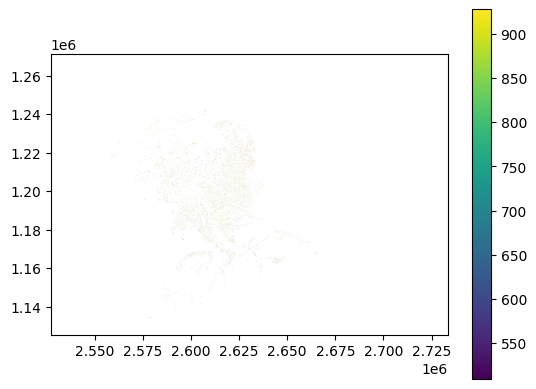

In [12]:
gdf.where(gdf['LNF_CODE'].isin(no_labels)).plot(column='LNF_CODE', legend=True)

Wir werden die Labels, welche nicht im ZüriCrop Datensatz vorkommen,  entfernen. Das heisst, dass von den 272'631 Datenpunkten noch 234'324 übrig bleiben.

In [13]:
gdf_clean = gdf[gdf['LNF_CODE'].isin(no_labels)==False]

# Modell-Resultate ETH 
Im folgenden werten wir die Modellresultate der ETH auf der untersten Hierarchiestufe aus. 

In [29]:
results = pd.read_csv('results_ETH.txt', delim_whitespace=True, names=['raw_ENG', 'Dataset_perc', 'Accuracy'])
results.head()

,raw_ENG,Dataset_perc,Accuracy
0,SummerWheat,(0.13%),38.0
1,WinterWheat,(10.77%),95.7
2,Wheat,(1.20%),39.4
3,EinkornWheat,(0.14%),49.8
4,SummerBarley,(0.05%),26.1


In [27]:
results.iloc[34,0]

'Biodiversity'

In der folgenden Grafik ist ersichtlich, dass viele der 48 Klassen nur sehr selten im Datensatz vorkommen, es jedoch eine Klasse gibt, die sehr oft vorkommt - dies ist die Klasse "meadow". Da wir zum Ziel haben den Berndatensatz insbesondere dort einzusetzen, wo wir Möglichkeiten sehen, den ZüriCrop Datensatz zu vergrössern, möchten wir uns auf Klassen konzentrieren, die keine hohe accuracy aufweisen und nicht oft im Datensatz ZüriCrop vorkommen.

<Axes: title={'center': 'Accuracy and portion of dataset'}, xlabel='Accuracy', ylabel='Dataset_perc'>

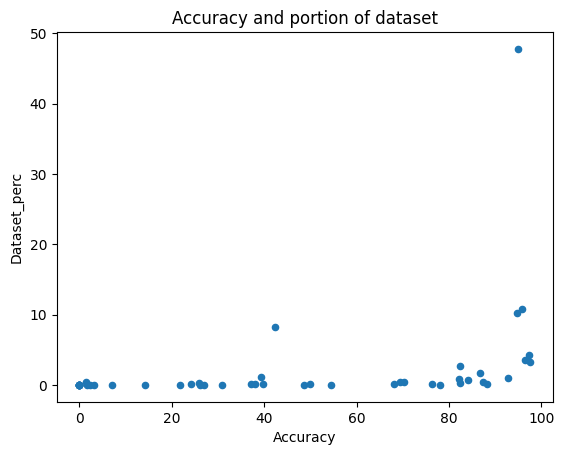

In [37]:
results['Dataset_perc'] = results['Dataset_perc'].replace('\(', '', regex=True)
results['Dataset_perc'] = results['Dataset_perc'].replace('\<', '', regex=True)
results['Dataset_perc'] = results['Dataset_perc'].replace('%\)', '', regex=True)
results['Dataset_perc'] = results['Dataset_perc'].astype('float')
results.plot.scatter(x='Accuracy', y='Dataset_perc', title='Accuracy and portion of dataset')

Wenn wir reinzoomen und uns nur die Klassen betrachten, die weniger als 1% des gesamten datensatz ZüriCrop ausmachen, erkennen wir folgendes:

<Axes: title={'center': 'Accuracy and portion of dataset ZüriCrop'}, xlabel='Accuracy', ylabel='Dataset_perc'>

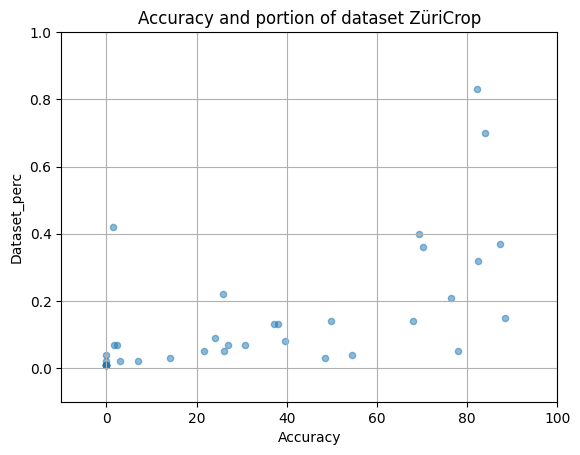

In [16]:
results.plot.scatter(x='Accuracy', y='Dataset_perc', ylim=(-0.1,1), xlim=(-10,100),title='Accuracy and portion of dataset ZüriCrop', grid=True, alpha=0.5)

Die Resultate der ETH werden mithilfe der Labels_Tabelle ergänzt um den LNF-code. Daraus möchten wir die Klassen herausfiltern, die folgende Benchmarks unterschreiten:

* Accuracy < 60%, Vorkommen im Datensatz < 0.2%: 33 Klassen
* Accuracy < 60%, Vorkommen im Datensatz < 0.1%: 29 Klassen
* Accuracy < 40%, Vorkommen im Datensatz < 0.1%: 26 Klassen
* Accuracy < 20%, Vorkommen im Datensatz < 0.1%: 17 Klassen

In [31]:
label_hier = pd.read_csv('../Level_hierarchy.csv')
label_hier = label_hier.rename(columns={'level3-name': 'raw_ENG'})

In [33]:
label_hier.iloc[34:37,4]='Biodiversity'
label_hier.iloc[43,4]='Field_bean'

In [39]:
result_code = pd.merge(label_hier, results, on='raw_ENG', how='left')
result_code = result_code.replace(np.nan, 0)

In [40]:
acc60_per02= result_code[(result_code['Accuracy'] < 60) & (result_code['Dataset_perc'] < 0.2)].LNF_code.to_list()
acc60_per01= result_code[(result_code['Accuracy'] < 60) & (result_code['Dataset_perc'] < 0.1)].LNF_code.to_list()
acc40_per01= result_code[(result_code['Accuracy'] < 40) & (result_code['Dataset_perc'] < 0.1)].LNF_code.to_list()
acc20_per01= result_code[(result_code['Accuracy'] < 20) & (result_code['Dataset_perc'] < 0.1)].LNF_code.to_list()

In [41]:
result_code_48 = result_code[result_code.level2!=0]

In [42]:
LNF_mask = result_code_48.LNF_code.to_list()
gdf_clean_48 = gdf[gdf['LNF_CODE'].isin(LNF_mask)==True]

## Aufbereitung für Sentinel-Daten

Ziel ist es nun herauszufinden, in welchen bereichen des Kanton Berns wir Sentineldaten benötigen, um den Datensatz zu vergrössern. Hierzu versuchen wir herauszufinden, wo wir entsprechend den oben definierten Benchmarks Bereiche finden, in denen wir den ZüriCrop Datensatz sinnvoll ergänzen können.
Da die Sentineldaten in einem globale Koordinatensystem WSG 84 vorliegen, werden wir die GIS-Daten transformieren.

In [43]:
gdf_84 = gdf_clean_48.to_crs(4326)

In [44]:
gdf60_20 = gdf_84[gdf_84['LNF_CODE'].isin(acc60_per02)]
gdf60_10 = gdf_84[gdf_84['LNF_CODE'].isin(acc60_per01)]
gdf40_10 = gdf_84[gdf_84['LNF_CODE'].isin(acc40_per01)]
gdf20_10 = gdf_84[gdf_84['LNF_CODE'].isin(acc20_per01)]

In [45]:
def sum_quadrant(geo_df, step):

    list_x = list(np.arange(7.0, 8.0 +step, step))
    list_y = list(np.arange(46.4, 47.4 +step, step))

    results = []
    
    for i in range(len(list_x)-1):        
        for j in range(len(list_y)-1):   
                     
            sum_value =  geo_df.cx[list_x[i]:list_x[i+1],list_y[j]:list_y[j+1]].Shape_Area.sum()/1000
            result_entry = {'i': list_x[i], 'j': list_y[j], 'sum': sum_value}
            results.append(result_entry)
    results = pd.DataFrame(results)
    return results

In [46]:
plot60_20 = sum_quadrant(gdf60_20, 0.024)
plot60_10 = sum_quadrant(gdf60_10, 0.024)
plot40_10 = sum_quadrant(gdf40_10, 0.024)
plot20_10 = sum_quadrant(gdf20_10, 0.024)

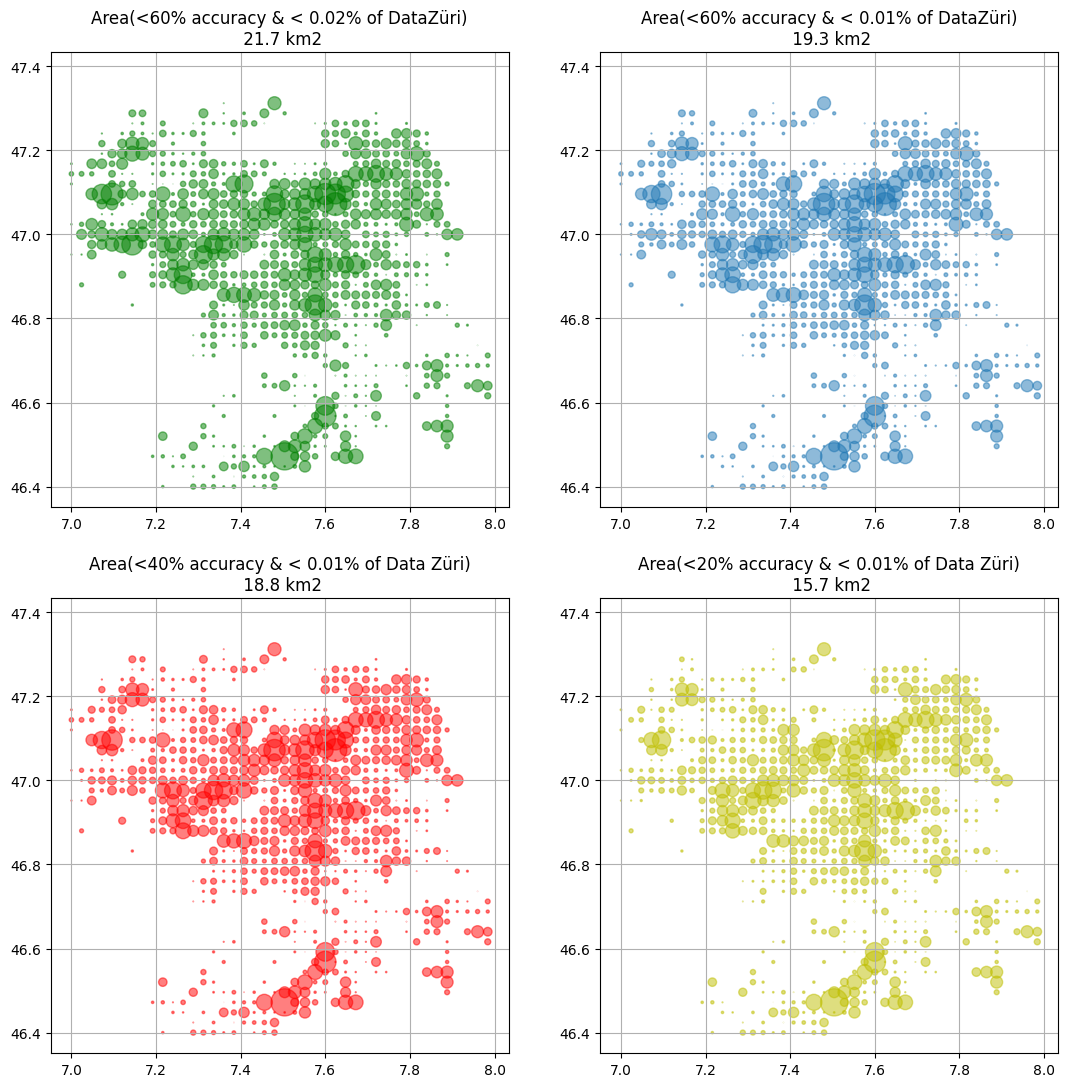

In [47]:
fig, axs = plt.subplots(2,2,figsize=(13,13))
axs[0,0].scatter(x='i', y='j', s='sum', data=plot60_20, alpha=0.5, c='g')
axs[0,0].set_title('Area(<60% accuracy & < 0.02% of DataZüri)\n 21.7 km2')

axs[0,1].scatter(x='i', y='j', s='sum', data=plot60_10, alpha=0.5)
axs[0,1].set_title('Area(<60% accuracy & < 0.01% of DataZüri)\n 19.3 km2')

axs[1,0].scatter(x='i', y='j', s='sum', data=plot40_10, alpha=0.5, c='r')
axs[1,0].set_title('Area(<40% accuracy & < 0.01% of Data Züri)\n 18.8 km2')

axs[1,1].scatter(x='i', y='j', s='sum', data=plot20_10, alpha=0.5, c='y')
axs[1,1].set_title('Area(<20% accuracy & < 0.01% of Data Züri)\n 15.7 km2')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

In [48]:
print(gdf60_20.Shape_Area.sum()/1000000)
print(gdf60_10.Shape_Area.sum()/1000000)
print(gdf40_10.Shape_Area.sum()/1000000)
print(gdf20_10.Shape_Area.sum()/1000000)


22.696808483418888
20.324841219495717
19.821891558938816
16.692244221428297


### Bounding box und Geometrie für Sentinel-Abfrage

Die Umhüllende des GIS-Datensatzes für den Kanton Bern ist wie folgt:

In [ ]:
gdf_clean.total_bounds

In [52]:
from sentinelhub import (
    CRS,
    BBox,
    bbox_to_dimensions,
    transform_point
)

c:\Users\danie\.virtualenvs\AgroLuege-HGn9_VQi\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: >

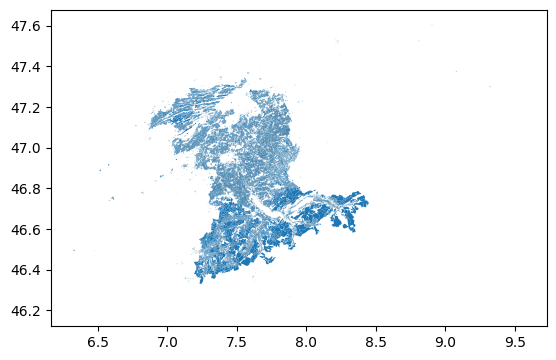

In [49]:
gdf_84.plot()

<Axes: >

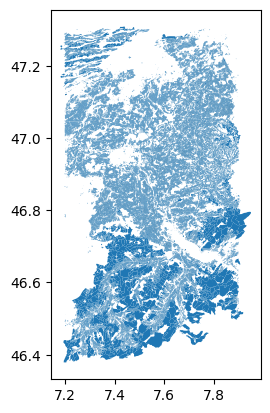

In [50]:
#46.4 - 47.3 / 7.35-7.9
gdf_84.cx[7.2:7.9, 46.4:47.3].plot()

In [53]:
betsiboka_coords_wgs84 = (7.2, 46.4, 7.9, 47.3)
def get_pixel(coord):
    resolution = 10
    betsiboka_bbox = BBox(bbox=coord, crs=CRS.WGS84)
    betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

    print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

get_pixel(betsiboka_coords_wgs84)

Image shape at 10 m resolution: (5521, 9902) pixels


In [55]:
x_start = 361630.678100406
y_start = 5140066.039024595
x_end = x_start + 23*2400
y_end = y_start + 41*2400
bbox_to_dimensions(BBox(bbox=(x_start, y_start, x_end, y_end), crs=32632), resolution=10)

(5520, 9840)

In [56]:
gdf_32632 = gdf_84.to_crs(32632)

In [58]:
area_box = []
x_start = 361630.678100406
y_start = 5140066.039024595
step= 2400
x_end = x_start + 23*step
y_end = y_start + 41*step
x_coordinate = list(np.arange(x_start, x_end, step))
y_coordinate = list(np.arange(y_start, y_end, step))
for i in range(len(x_coordinate)):
    for j in range(len(y_coordinate)):
        area = gdf_32632.cx[x_coordinate[i]:x_coordinate[i]+2400, y_coordinate[j]:y_coordinate[j]+2400].Shape_Area.sum()/1000000
        box_entry = {'x1': x_coordinate[i], 'y1': y_coordinate[j],'x2': x_coordinate[i]+2400,'y2': y_coordinate[j]+2400, 'area': area}
        area_box.append(box_entry)
area_boxes = pd.DataFrame(area_box)


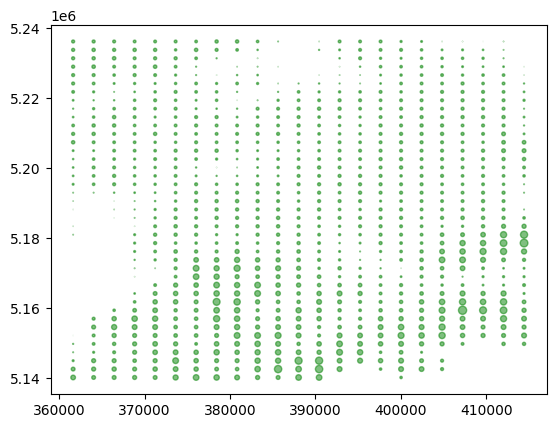

In [59]:
plt.scatter(x='x1', y='y1', s='area', data=area_boxes, alpha=0.5, c='g')

In [62]:
area_boxes.replace(0, np.nan, inplace=True)
print(area_boxes.area.isna().sum())
area_boxes.to_csv('bboxes_sentinel.csv')

79


<Axes: >

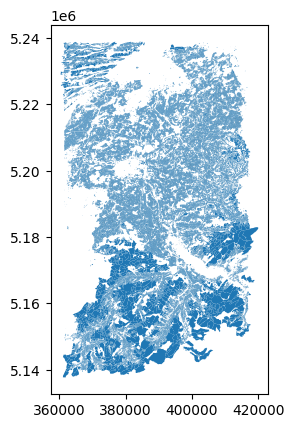

In [61]:
gdf_32632.cx[x_start:x_end, y_start: y_end].plot()